# Atividade
###**Grupo 5**

## Alunos
- Daniel Sena (dmms@cesar.school)
- Victor Souza (vrss@cesar.school)
- Olavo Ferraz Neto (ofn@cesar.school)

In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_lyrics = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2001/dados/dataset_lyrics.csv')
df_lyrics.head(10)

,cantorId,cantorNome,musicaNome,letra
0,0,10000-maniacs,More Than This,I could feel at the time. There was no way of ...
1,0,10000-maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close..."
2,0,10000-maniacs,These Are Days,These are. These are days you'll remember. Nev...
3,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an..."
4,0,10000-maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...
5,0,10000-maniacs,Don't Talk,"Don't talk, I will listen. Don't talk, you kee..."
6,0,10000-maniacs,Across The Fields,"Well they left then in the morning, a hundred ..."
7,0,10000-maniacs,Planned Obsolescence,[ music: Dennis Drew/lyric: Natalie Merchant ]...
8,0,10000-maniacs,Rainy Day,On bended kneeI've looked through every window...
9,0,10000-maniacs,Anthem For Doomed Youth,For whom do the bells toll. When sentenced to ...


In [8]:
df_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49387 entries, 0 to 49386
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cantorId    49387 non-null  int64 
 1   cantorNome  49387 non-null  object
 2   musicaNome  49387 non-null  object
 3   letra       49376 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


## Padronizando colunas

In [9]:
df_lyrics = df_lyrics.rename(columns={'cantorId': 'cantor_id', 'cantorNome': 'cantor_nome', 'musicaNome': 'musica_nome' })
df_lyrics.head(1)

,cantor_id,cantor_nome,musica_nome,letra
0,0,10000-maniacs,More Than This,I could feel at the time. There was no way of ...


## Identificando valores `null`



In [10]:
df_null_lyrics = df_lyrics[df_lyrics['letra'].isnull()]
df_null_lyrics_shape = df_null_lyrics.shape
print(f'existem {df_null_lyrics_shape[0]} registros de letras vazias')

existem 11 registros de letras vazias


In [11]:
df_lyrics.dropna(subset='letra', inplace=True)

## Removendo valores `null`

In [12]:
df_null_lyrics = df_lyrics[df_lyrics['letra'].isnull()]
df_null_lyrics_shape = df_null_lyrics.shape
print(f'existem {df_null_lyrics_shape[0]} registros de letras vazias')

existem 0 registros de letras vazias


## Adicionando tamanho da letra

In [13]:
df_lyrics['letra_lenght'] = df_lyrics['letra'].apply(lambda x: len(x))
df_lyrics.head(10)

,cantor_id,cantor_nome,musica_nome,letra,letra_lenght
0,0,10000-maniacs,More Than This,I could feel at the time. There was no way of ...,755
1,0,10000-maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close...",1253
2,0,10000-maniacs,These Are Days,These are. These are days you'll remember. Nev...,884
3,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",1283
4,0,10000-maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,650
5,0,10000-maniacs,Don't Talk,"Don't talk, I will listen. Don't talk, you kee...",1351
6,0,10000-maniacs,Across The Fields,"Well they left then in the morning, a hundred ...",645
7,0,10000-maniacs,Planned Obsolescence,[ music: Dennis Drew/lyric: Natalie Merchant ]...,737
8,0,10000-maniacs,Rainy Day,On bended kneeI've looked through every window...,647
9,0,10000-maniacs,Anthem For Doomed Youth,For whom do the bells toll. When sentenced to ...,1011


## Adicionando Tamanho do Nome da Música

In [14]:
df_lyrics['musica_nome_lenght'] = df_lyrics['musica_nome'].apply(lambda x: len(x))
df_lyrics.head(10)

,cantor_id,cantor_nome,musica_nome,letra,letra_lenght,musica_nome_lenght
0,0,10000-maniacs,More Than This,I could feel at the time. There was no way of ...,755,14
1,0,10000-maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close...",1253,17
2,0,10000-maniacs,These Are Days,These are. These are days you'll remember. Nev...,884,14
3,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",1283,15
4,0,10000-maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,650,23
5,0,10000-maniacs,Don't Talk,"Don't talk, I will listen. Don't talk, you kee...",1351,10
6,0,10000-maniacs,Across The Fields,"Well they left then in the morning, a hundred ...",645,17
7,0,10000-maniacs,Planned Obsolescence,[ music: Dennis Drew/lyric: Natalie Merchant ]...,737,20
8,0,10000-maniacs,Rainy Day,On bended kneeI've looked through every window...,647,9
9,0,10000-maniacs,Anthem For Doomed Youth,For whom do the bells toll. When sentenced to ...,1011,23


## Identificando Músicas Duplicadas

In [15]:
df_dupes = df_lyrics.groupby(['cantor_nome','musica_nome']).size().reset_index(name='counts')
df_dupes = df_dupes.query('counts > 1')
df_dupes.head(10)

,cantor_nome,musica_nome,counts
0,10000-maniacs,A Campfire Song,2
1,10000-maniacs,A Room For Everything,2
2,10000-maniacs,Across The Fields,2
3,10000-maniacs,All That Never Happens,2
6,10000-maniacs,Anthem For Doomed Youth,2
8,10000-maniacs,Back O' The Moon,2
9,10000-maniacs,Because The Night,2
15,10000-maniacs,Can't Ignore The Train,2
25,10000-maniacs,Don't Talk,2
28,10000-maniacs,Eat For Two,2


### Removendo duplicadas

In [16]:
df_lyrics.drop_duplicates(subset=['cantor_nome','musica_nome'], inplace=True)

#### Validando remoção

In [17]:
df_lyrics[(df_lyrics['cantor_nome'] =='10000-maniacs') & (df_lyrics['musica_nome'] == 'A Campfire Song')]

,cantor_id,cantor_nome,musica_nome,letra,letra_lenght,musica_nome_lenght
3,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",1283,15


## Reordenando colunas

In [18]:
new_column_order = ['cantor_id', 'cantor_nome', 'musica_nome', 'musica_nome_lenght', 'letra', 'letra_lenght']
df_lyrics = df_lyrics[new_column_order]
df_lyrics.head(5)

,cantor_id,cantor_nome,musica_nome,musica_nome_lenght,letra,letra_lenght
0,0,10000-maniacs,More Than This,14,I could feel at the time. There was no way of ...,755
1,0,10000-maniacs,Because The Night,17,"Take me now, baby, here as I am. Hold me close...",1253
2,0,10000-maniacs,These Are Days,14,These are. These are days you'll remember. Nev...,884
3,0,10000-maniacs,A Campfire Song,15,"A lie to say, ""O my mountain has coal veins an...",1283
4,0,10000-maniacs,Everyday Is Like Sunday,23,Trudging slowly over wet sand. Back to the ben...,650


In [19]:
df_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38754 entries, 0 to 49386
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cantor_id           38754 non-null  int64 
 1   cantor_nome         38754 non-null  object
 2   musica_nome         38754 non-null  object
 3   musica_nome_lenght  38754 non-null  int64 
 4   letra               38754 non-null  object
 5   letra_lenght        38754 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.1+ MB


In [20]:
df_lyrics[['musica_nome_lenght', 'letra_lenght']].describe()

,musica_nome_lenght,letra_lenght
count,38754.000000,38754.000000
mean,15.612659,1045.430743
std,8.327879,802.351193
min,1.000000,3.000000
25%,10.000000,691.000000
50%,14.000000,959.000000
75%,19.000000,1286.000000
max,90.000000,64047.000000


## Gráficos

### Cantores x Quantidade de Músicas

In [21]:
df_singer_production = df_lyrics.groupby('cantor_nome').size().reset_index(name='quantidade_musicas').sort_values(by='quantidade_musicas', ascending=False)
df_singer_production = df_singer_production[df_singer_production['quantidade_musicas'] > 100]
fig = px.bar(df_singer_production,
       y='quantidade_musicas',
       x='cantor_nome',
       title='Quantidade de Músicas por Cantor (Acima de 1000 músicas)',
       labels={'quantidade_musicas':'Quantidade', 'cantor_nome':'Cantores'},
       text_auto=True,
       height=600,
       width=1400)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_xaxes(tickangle=45)
fig.show()

### Cantores por Tamanho Médio de Letra

In [22]:
df_average_lyrics_length = df_lyrics.groupby('cantor_nome')['letra_lenght'].mean().reset_index(name='average_lyrics_length').sort_values(by='average_lyrics_length', ascending=False)
df_average_lyrics_length = df_average_lyrics_length[df_average_lyrics_length['average_lyrics_length'] > 1000]

fig = px.bar(df_average_lyrics_length,
       y='average_lyrics_length',
       x='cantor_nome',
       title='Comprimento Médio das Letras por Cantor (Acima de 1000 caracteres)',
       labels={'average_lyrics_length':'Comprimento Médio', 'cantor_nome':'Cantores'},
       text_auto=True,
       height=600,
       width=1400,
       color='average_lyrics_length',
       color_continuous_scale='Viridis')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_xaxes(tickangle=45)
fig.show()

### Distribuição dos Comprimentos Médios das Letras (Acima de 1000 caracteres)

In [23]:
df_average_lyrics_length = df_lyrics.groupby('cantor_nome')['letra_lenght'].mean().reset_index(name='average_lyrics_length').sort_values(by='average_lyrics_length', ascending=False)
df_average_lyrics_length = df_average_lyrics_length[df_average_lyrics_length['average_lyrics_length'] > 1000]

fig = px.histogram(df_average_lyrics_length,
                   x='average_lyrics_length',
                   title='Distribuição dos Comprimentos Médios das Letras (Acima de 1000 caracteres)',
                   text_auto=True,
                   height=600,
                   width=1400,)
fig.update_layout(bargap=0.2)
fig.update_layout(
    xaxis_title='Comprimento Médio da Letra',
    yaxis_title='Número de Cantores')
fig.show()

### Relação entre Tamanho do Nome da Música e Tamanho da Letra

In [24]:
fig = px.scatter(df_lyrics,
                 x='musica_nome_lenght',
                 y='letra_lenght',
                 title='Relação entre Tamanho do Nome da Música e Tamanho da Letra',
                 labels={'musica_nome_lenght':'Tamanho do Nome da Música', 'letra_lenght':'Tamanho da Letra'},
                 color='letra_lenght',
                 height=600,
                 width=1400)

fig.show()


###Gráfico de Hexbin comparando o comprimento dos nomes das músicas com o comprimento das letras

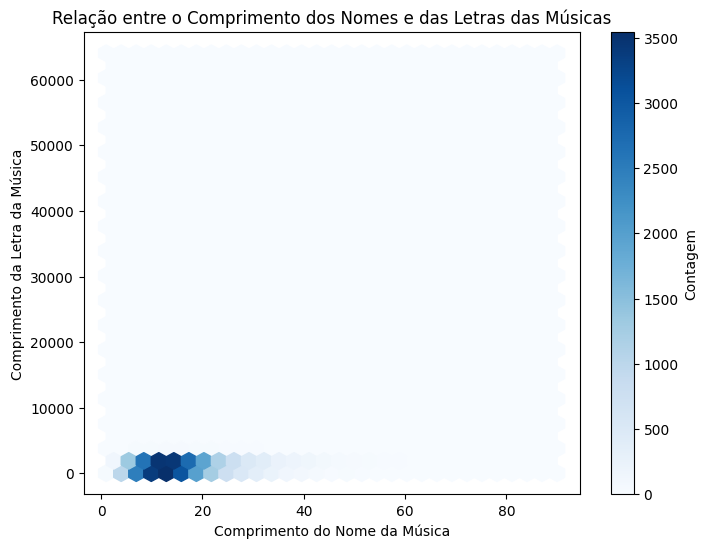

In [25]:
plt.figure(figsize=(8, 6))
plt.hexbin(df_lyrics['musica_nome_lenght'], df_lyrics['letra_lenght'], gridsize=30, cmap='Blues')
plt.colorbar(label='Contagem')
plt.xlabel('Comprimento do Nome da Música')
plt.ylabel('Comprimento da Letra da Música')
plt.title('Relação entre o Comprimento dos Nomes e das Letras das Músicas')
plt.show()

### Gráfico de Regressão: Relação entre o Comprimento dos Nomes e das Letras das Músicas

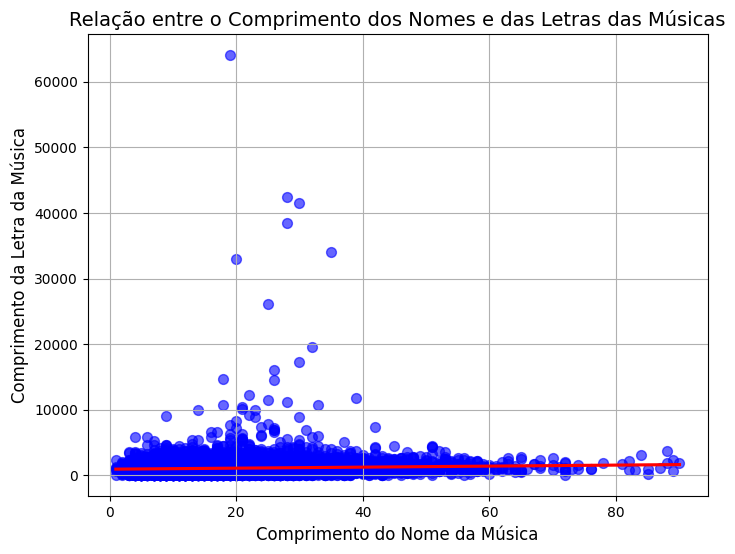

In [26]:
plt.figure(figsize=(8, 6))
sns.regplot(x='musica_nome_lenght', y='letra_lenght', data=df_lyrics, color='blue', line_kws={"color": "red"}, scatter_kws={"s": 50, "alpha": 0.6})
plt.xlabel('Comprimento do Nome da Música', fontsize=12)
plt.ylabel('Comprimento da Letra da Música', fontsize=12)
plt.title('Relação entre o Comprimento dos Nomes e das Letras das Músicas', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

#Buscador de Dados

###Palavras que mais se repetem da coluna de Músicas


In [27]:
from collections import Counter
contador_palavras = Counter(' '.join(df_lyrics['musica_nome'].values).split(' '))
ocorrencias = pd.DataFrame({'word': contador_palavras.keys(), 'count': contador_palavras.values()})
ocorrencias = ocorrencias[ocorrencias['word'].apply(len) > 1]

ocorrencias = ocorrencias.sort_values(by='count', ascending=False)
ocorrencias.head(15)

,word,count
4,The,4175
138,You,1825
66,Of,1492
219,Me,1292
45,To,1148
52,In,1085
48,Love,1000
103,My,979
117,On,752
252,It,633


## Busca de Termos

In [28]:
#!pip install fuzzywuzzy
#!pip install python-Levenshtein


In [29]:
from fuzzywuzzy import fuzz

In [30]:
def similarity(lyric: str, term: str):
    return fuzz.partial_ratio(lyric.lower(), term.lower())

In [32]:
search_term = input('O que deseja buscar?')
df_search_result = df_lyrics[df_lyrics['letra'].apply(lambda x:similarity(x, search_term)) > 70]
df_search_result.head(100)

,cantor_id,cantor_nome,musica_nome,musica_nome_lenght,letra,letra_lenght
3,0,10000-maniacs,A Campfire Song,15,"A lie to say, ""O my mountain has coal veins an...",1283
7,0,10000-maniacs,Planned Obsolescence,20,[ music: Dennis Drew/lyric: Natalie Merchant ]...,737
19,0,10000-maniacs,Poison In The Well,18,[ music: Dennis Drew/words: Natalie Merchant ]...,1286
27,0,10000-maniacs,Among The Americans,19,[ music: Robert Buck & Dennis Drew/lyric: Nata...,945
36,0,10000-maniacs,Bread And Circuses,18,[ Billy Bragg and Natalie Merchant ]. . Crowds...,1260
...,...,...,...,...,...,...
4979,57,badfinger,Come Down Hard,14,"I heard a lover lie, saw a lady cry her heart ...",950
5001,57,badfinger,I Can't Believe In,18,I can’t believe in some of the stories. Some o...,556
5042,57,badfinger,Passin' Time,12,"I couldn't believe it, the look in your eyes. ...",1020
5209,65,banda-hey-11,Oh! Charlie,11,Oh! Charlie. Por favor me explica. Quanto mais...,540
